In [4]:
from typing import Any, Optional

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import matplotlib.colors as colors

import anguilla.hypervolume as hv

In [66]:
def line(m, b):
    """Compute a line"""
    return lambda x: m * x + b

def curve(a, b):
    """Compute a quadratic curve"""
    return lambda x: a * x * x + b

def get_objective_points(domain, *fns):
    """Evaluate the functions on the domain to create a population."""
    size = len(domain) * len(fns)
    points = np.empty((size, 2))
    i = 0
    for fn in fns:
        points[i : i + len(domain), 0] = domain
        points[i : i + len(domain), 1] = fn(domain)
        i += len(domain)
    return points

def contributions_plot(points: np.ndarray, contributions: np.ndarray, deleted = np.array([])) -> Any:
    fig = plt.figure(figsize=(12, 6))
    axs = fig.subplots(1, 1)
    # We assume the points are ordered from left-most extreme point
    # to right-most extreme point
    min_contrib = np.min(contributions[1:-1]) 
    max_contrib = np.max(contributions[1:-1])
    contribs_cmap = plt.cm.get_cmap("jet", len(contributions) - 2)
    # We plot the extreme points as stars since they have infinite contribution
    for i, point in enumerate(points):
        if i == 0 or i == len(points) - 1:
            axs.plot(points[i, 0], points[i, 1], marker="*", markersize=12,
                     color="black", markerfacecolor="black", linestyle="", zorder=3)
        else:
            contrib_color = contribs_cmap(contributions[i] / max_contrib)
            rectangle = Rectangle(points[i],
                                  width=points[i+1, 0] - points[i, 0],
                                  height=points[i-1, 1] - points[i, 1],
                                  facecolor=contrib_color,
                                  alpha=1.0,
                                  zorder=1)
            axs.add_patch(rectangle)
            axs.plot(points[i, 0], points[i, 1], marker="+", markersize=12, color="black", linestyle="", zorder=2)

    axs.plot(deleted[:, 0], deleted[:, 1], marker="+", markersize=12, color="red", linestyle="", zorder=2)
    cbar = fig.colorbar(plt.cm.ScalarMappable(colors.Normalize(min_contrib, max_contrib), cmap=contribs_cmap), ax=axs)
    cbar.set_label('Contribution', rotation=270, labelpad=10)
    return fig

In [67]:
def non_dominated_indicator_selection(points, n):
    # Assumes an array of non-dominated points and selects the n best
    # We need to remove the n points with least contribution
    deleted = []
    for i in range(n):
        contributions = hv.contributions(points)
        sorted_idx = np.argsort(contributions)
        deleted.append(points[sorted_idx[0]])
        fig = contributions_plot(points, contributions, np.array(deleted))
        points = np.delete(points, sorted_idx[0], axis=0)
    return np.array(deleted)

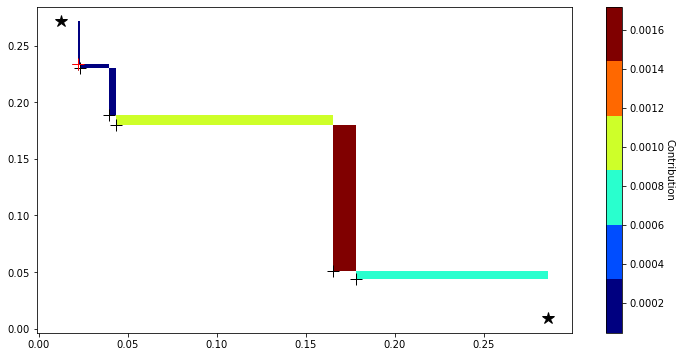

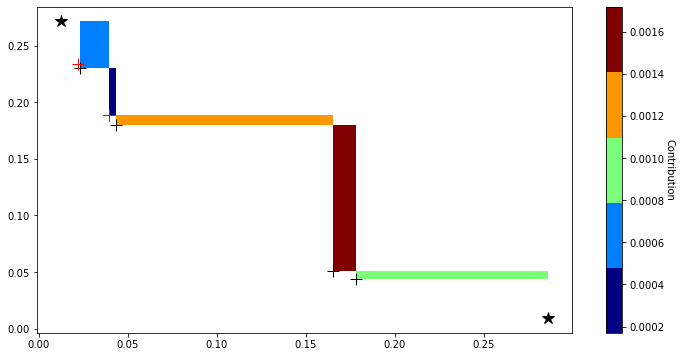

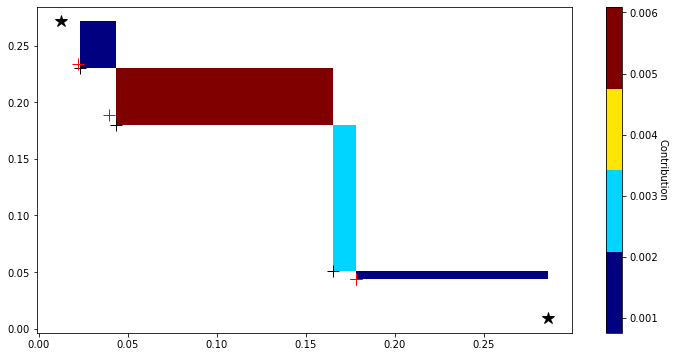

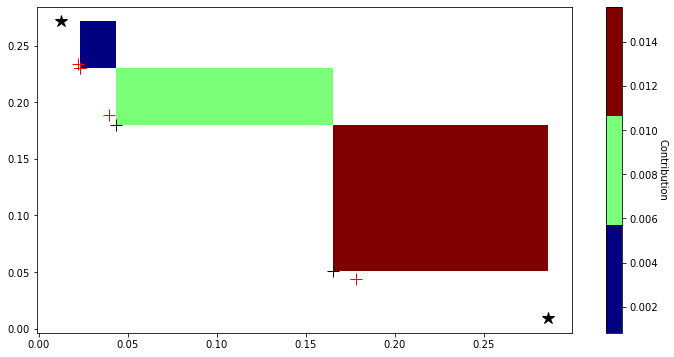

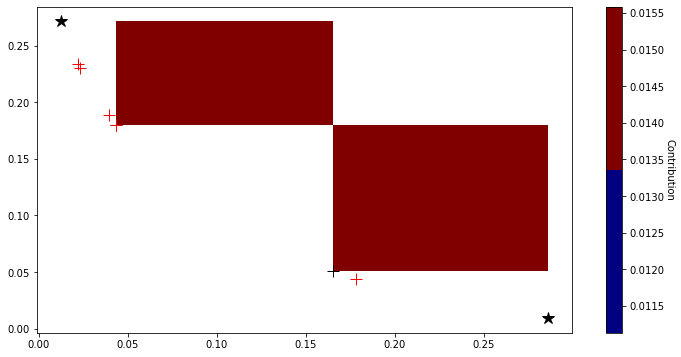

In [68]:
points = np.array([[0.01245897, 0.27127751],
       [0.02213313, 0.23395707],
       [0.0233907 , 0.22994154],
       [0.0392689 , 0.1886141 ],
       [0.04339422, 0.17990426],
       [0.16521067, 0.05107939],
       [0.17855283, 0.0440614 ],
       [0.28619405, 0.00950565]])

deleted = non_dominated_indicator_selection(points, 5)

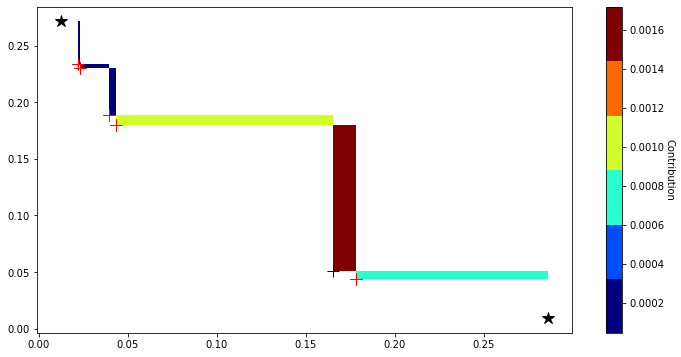

In [69]:
fig = contributions_plot(points, hv.contributions(points), deleted)

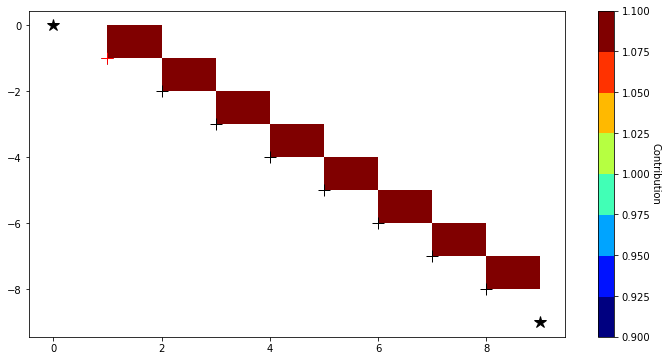

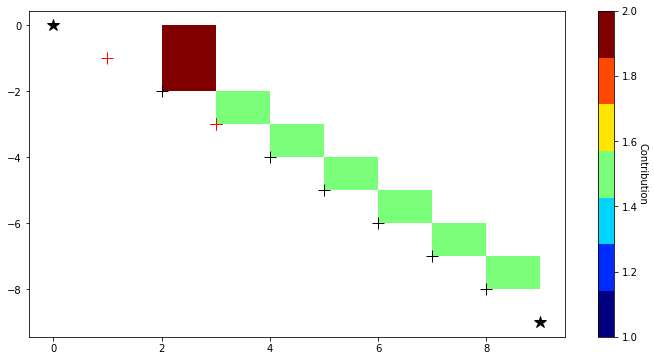

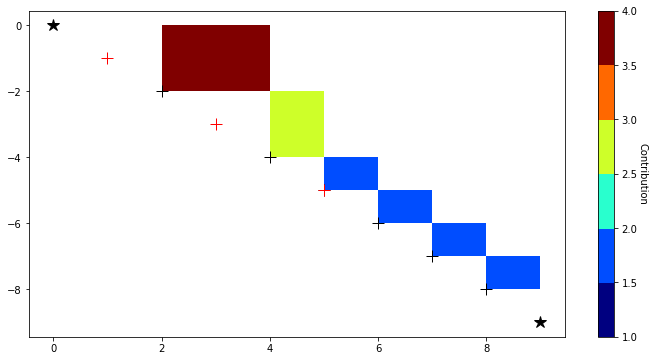

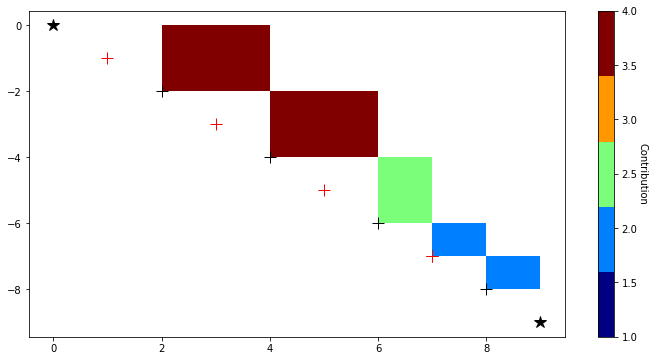

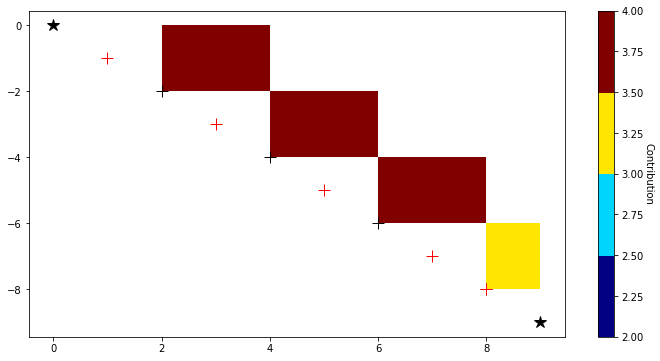

In [73]:
size = 10
points = get_objective_points(np.arange(0, size), line(-1, 0))

deleted = non_dominated_indicator_selection(points, 5)

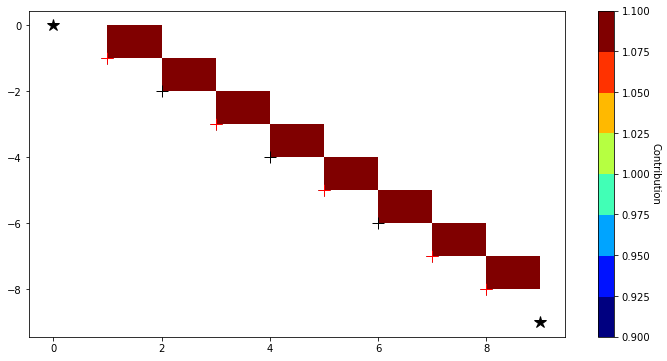

In [74]:
fig = contributions_plot(points, hv.contributions(points), deleted)